In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DeepAgent.agents import DQN, DoubleDQN, DoublePER
from DeepAgent.networks import dueling, dqn
from DeepAgent.utils.buffer import ExperienceReplay, PrioritizedExperienceReplay
from DeepAgent.utils.game import GameEnv
from TrainEvaluationWrapper import testWrapper

from config import *

In [2]:
evaluation_episode = TEST_MAX_EPISODE

In [3]:
# plot reward
def plot_reward(rewards, title):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards)
    plt.xlabel('episode')
    plt.ylabel('reward')
    plt.title(title)
    plt.show()

# Evaluate DQN
## Base DQN agent with ExperienceReply + CNN
#### 1. Build CNN agent

In [4]:
dqn_agent, test_env = testWrapper(agent=DQN.DQNAgent, env=GameEnv, network=dqn.DQNNetwork, buffer=ExperienceReplay, test_id='DQN_v1')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 84, 84, 4)]       0         
                                                                 
 lambda (Lambda)             (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8192      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32768     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36864     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               160614

A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]


#### 2. Evaluate with DQN saving model

In [17]:
dqn_id = 'DQN_v2'
dqn_path = f'models/{dqn_id}'
dqn_rewards = dqn_agent.play(test_env=test_env, saving_path=dqn_path, video_dir=f'./video/{dqn_id}1',render=True, max_episode=evaluation_episode)

Loading Weights...


/Users/zwill/miniforge3/envs/DeepRL_DemonAttack/lib/python3.9/site-packages/gym/envs/atari/environment.py:267: UserWarning: WARN: We strongly suggest supplying `render_mode` when constructing your environment, e.g., gym.make(ID, render_mode='human'). Using `render_mode` provides access to proper scaling, audio support, and proper framerates.
  logger.warn(


Episode: 0, Episode Reward: 6120.0
Episode: 1, Episode Reward: 1760.0
Episode: 2, Episode Reward: 540.0
Episode: 3, Episode Reward: 1560.0
Episode: 4, Episode Reward: 5270.0
Episode: 5, Episode Reward: 3530.0
Episode: 6, Episode Reward: 5260.0
Episode: 7, Episode Reward: 5880.0
Episode: 8, Episode Reward: 3610.0
Episode: 9, Episode Reward: 2160.0
Maximum total_step 10 exceeded


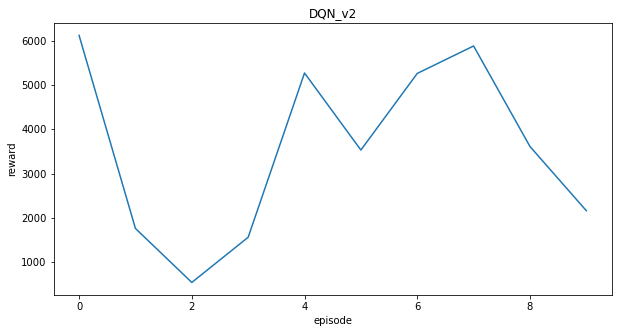

In [18]:
plot_reward(dqn_rewards, 'DQN_v2')

In [6]:
dddqn_agent, test_env = testWrapper(agent=DoubleDQN.DoubleDQNAgent, env=GameEnv, network=dueling.DuelingNetwork, buffer=ExperienceReplay, test_id='DDDQN_v1')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 84, 84, 4)]  0           []                               
                                                                                                  
 lambda_3 (Lambda)              (None, 84, 84, 4)    0           ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 20, 20, 32)   8192        ['lambda_3[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 9, 9, 64)     32768       ['conv2d_6[0][0]']               
                                                                                            

In [8]:
dddqn_id = 'DDDQN_v1'
dddqn_path = f'models/{dddqn_id}'
dddqn_rewards = dddqn_agent.play(test_env=test_env, saving_path=dddqn_path, video_dir=f'./video/{dddqn_id}1',render=True, max_episode=evaluation_episode)

Loading Weights...


/Users/zwill/miniforge3/envs/DeepRL_DemonAttack/lib/python3.9/site-packages/gym/envs/atari/environment.py:267: UserWarning: WARN: We strongly suggest supplying `render_mode` when constructing your environment, e.g., gym.make(ID, render_mode='human'). Using `render_mode` provides access to proper scaling, audio support, and proper framerates.
  logger.warn(


Episode: 0, Episode Reward: 325.0
Episode: 1, Episode Reward: 2050.0
Episode: 2, Episode Reward: 325.0
Episode: 3, Episode Reward: 2245.0
Episode: 4, Episode Reward: 355.0
Episode: 5, Episode Reward: 4670.0
Episode: 6, Episode Reward: 70.0
Episode: 7, Episode Reward: 1360.0
Episode: 8, Episode Reward: 3315.0
Episode: 9, Episode Reward: 2120.0
Maximum total_step 10 exceeded


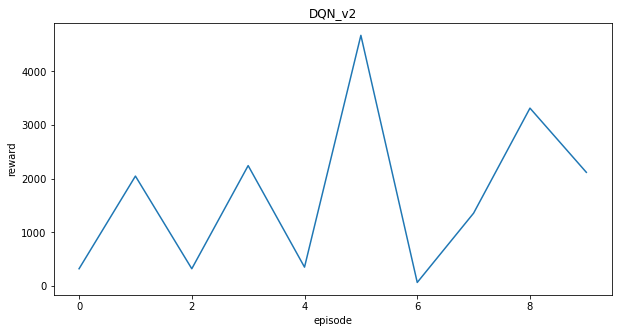

(None, 1683.5)

In [10]:
plot_reward(dddqn_rewards, 'DQN_v2'), np.mean(dddqn_rewards)